Задача: 
## Спрогнозировать у(х) с последнего значения до х=15 и отразить результат на графике. 
* Результат в виде ссылки на google collab либо прикрепить jupyter.   
* По возможности подготовить несколько вариантов решения

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_csv(r"C:\Users\vtk_ru1\OneDrive - Servier Monde\Рабочий стол\Project ML\transneft_test\test_work_transneft\data.csv")
sampl = np.arange(12.591554, 15.030000, 0.025183)
df_pred = pd.DataFrame(sampl, columns=['x'])
df_pred['y'] = ""

<Axes: ylabel='x'>

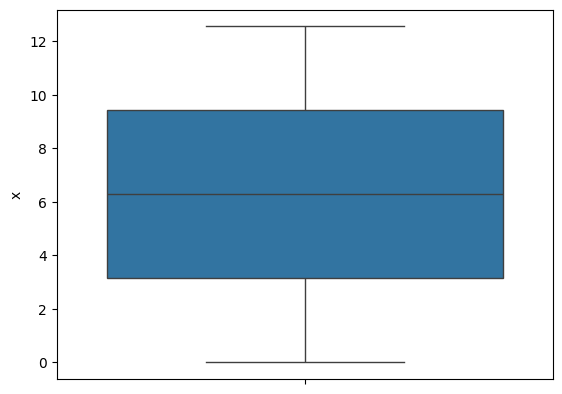

In [3]:
sns.boxplot(df['x'])

<Axes: ylabel='y'>

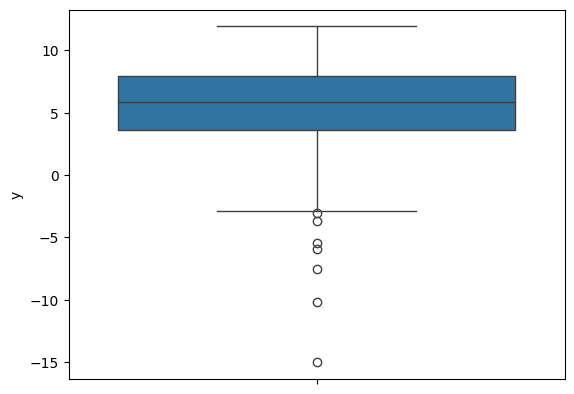

In [4]:
sns.boxplot(df['y'])

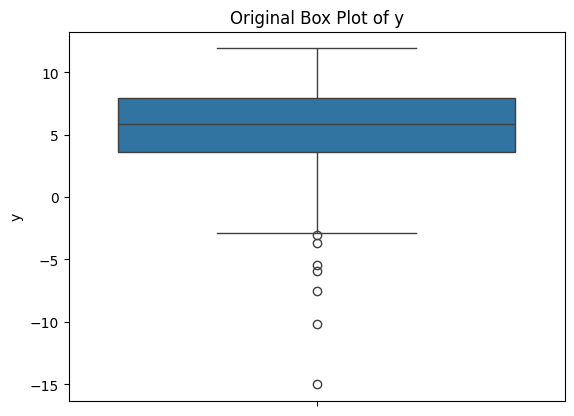

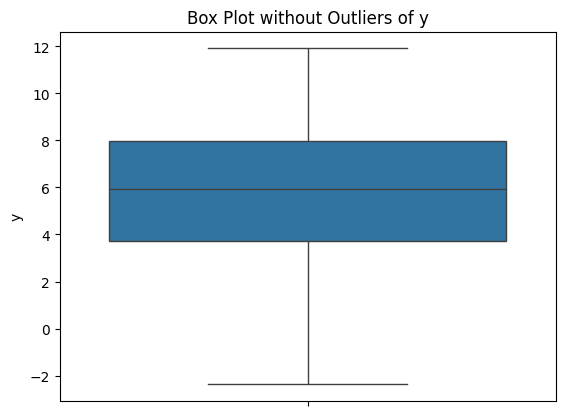

In [5]:
def removal_box_plot(df, y, threshold):
    sns.boxplot(df[y])
    plt.title('Original Box Plot of y')
    plt.show()
 
    removed_outliers = df[df[y] >= threshold]
 
    sns.boxplot(removed_outliers[y])
    plt.title('Box Plot without Outliers of y')
    plt.show()
    return removed_outliers
 
 
threshold_value = -2.5
 
df = removal_box_plot(df, 'y', threshold_value)

In [6]:
df

,x,y
8,0.201465,-2.371847
10,0.251831,-2.277133
11,0.277014,-1.919594
12,0.302197,-0.511188
13,0.327380,-0.754781
...,...,...
495,12.465638,7.887764
496,12.490821,7.991471
497,12.516004,8.313358
498,12.541188,9.128511


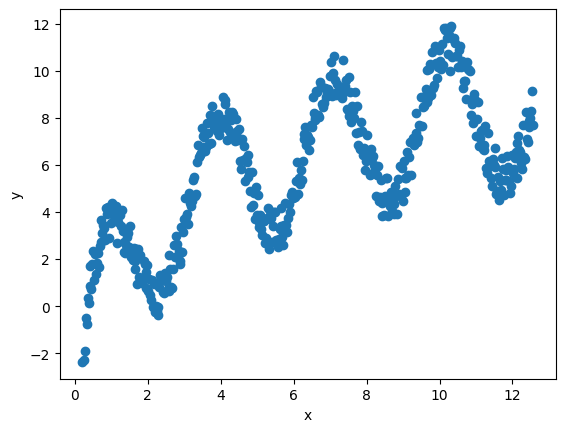

In [7]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x') 
plt.ylabel('y')
plt.show()

In [8]:
df

,x,y
8,0.201465,-2.371847
10,0.251831,-2.277133
11,0.277014,-1.919594
12,0.302197,-0.511188
13,0.327380,-0.754781
...,...,...
495,12.465638,7.887764
496,12.490821,7.991471
497,12.516004,8.313358
498,12.541188,9.128511


In [9]:
rng = np.random.RandomState(True)
X = np.array(df.x).reshape((-1, 1))
X_pred = np.array(df_pred.x).reshape((-1, 1))
y = np.array(df['y']).reshape(-1,)
y_pred = np.array(df_pred['y']).reshape(-1,)
#y_pred = np.sin(X_pred).ravel() + np.sin(7 * X_pred).ravel() + rng.normal(1, 1.5, X_pred.shape[0])

In [10]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

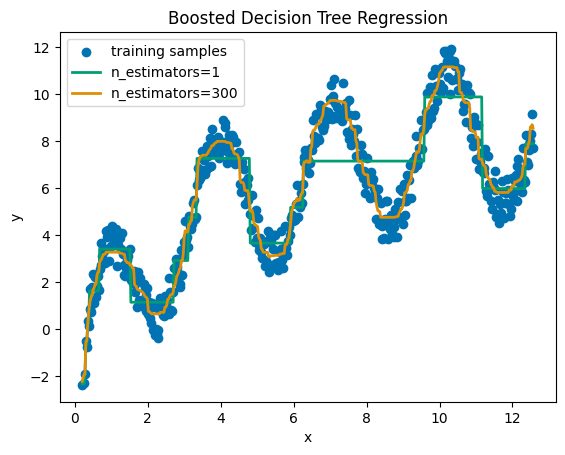

In [11]:
colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[2], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[1], label="n_estimators=300", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [12]:
mape = mean_absolute_percentage_error(y, y_2)
mape

0.5377949860800777

In [13]:
#X_pred = np.concatenate ((X, X_pred))

In [14]:
regr_1_pred = DecisionTreeRegressor(max_depth=4)

regr_2_pred = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1_pred.fit(X, y)
regr_2_pred.fit(X, y)

y_1_pred = regr_1_pred.predict(X_pred)
y_2_pred = regr_2_pred.predict(X_pred)
y_1_pred = y_1_pred.astype(float)
y_2_pred = y_2_pred.astype(float)

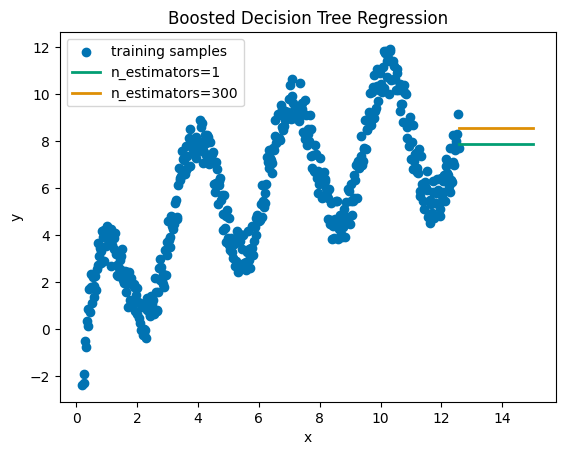

In [15]:
colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X_pred, y_1_pred, color=colors[2], label="n_estimators=1", linewidth=2)
plt.plot(X_pred, y_2_pred, color=colors[1], label="n_estimators=300", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()
